<a href="https://colab.research.google.com/github/TaysonMartinss/AnaliseExploratoria/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊IMPORTAÇÃO DOS DADOS

⚙️import das bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

🆙 carregando dataset

In [6]:
data = '/content/survey_results_public.csv'
dataframe = pd.read_csv(data)

🕵️ explorando o dataset

In [7]:
dataframe.head()
dataframe.tail()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65436,65437,I code primarily as a hobby,18-24 years old,"Student, full-time",NaN,Apples,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 🤔ANALISANDO O SCHEMA

**colunas relevantes:**

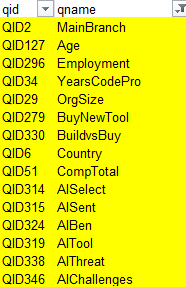


In [8]:
print(dataframe.isnull().sum())

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


# ⚙️SETUP DOS DADOS

**atribuindo colunas que irei usar nas variaveis**

In [9]:
profissao_df = dataframe['MainBranch']
idade_df = dataframe['Age']
ocupacao_df = dataframe['Employment']
anos_trabalhados_df = dataframe['YearsCodePro']
tamanho_empresa_df = dataframe['OrgSize']
pais_df = dataframe['Country']
usa_IA_df = dataframe['AISelect']
ia_opniao_df = dataframe['AISent']
ia_beneficios_df = dataframe['AIBen']
ia_desafios_df = dataframe ['AIChallenges']

**verificando Null's e NAN nas variáveis**

In [10]:
profissao_df.isnull().sum()

0

In [11]:
idade_df.isnull().sum()


0

In [12]:
ocupacao_df.isnull().sum()

0

In [13]:
anos_trabalhados_df.isnull().sum()

13827

In [14]:
tamanho_empresa_df.isnull().sum()

17957

In [15]:
pais_df.isnull().sum()

6507

In [16]:
usa_IA_df.isnull().sum()

4530

In [17]:
ia_opniao_df.isnull().sum()

19564

In [18]:
ia_beneficios_df.isnull().sum()

28543

In [19]:
ia_desafios_df.isnull().sum()

27906

🧮📊 TRATAMENTO DE DADOS

**AGRUPANDO OS PERFIS DOS CANDIDATOS | TRADUÇÃO DAS INFORMAÇÕES | SIMPLIFICAÇÃO DE MúLTIPLAS-ESCOLHAS**

In [20]:
#profissao não tem dados null's na coluna
profissao_df = profissao_df.replace({
    'I am a developer by profession': 'Dev Profissional',
    'I am learning to code': 'Estudante de Programação',
    'I code primarily as a hobby': 'Entusiasta',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Estagiarios',
    'I used to be a developer by profession, but no longer am': 'Dev Profissional'
})

In [21]:
profissao_df.unique()

array(['Dev Profissional', 'Estudante de Programação', 'Entusiasta',
       'Estagiarios'], dtype=object)

In [22]:
idade_df = idade_df.replace({
'Under 18 years old': 'Menor de 18 anos',
'35-44 years old': 'entre 35-44 anos de idade',
'45-54 years old': 'entre 45-54 anos de idade',
'18-24 years old': 'entre 18-24 anos de idade',
'25-34 years old': 'entre 25-34 anos de idade',
'55-64 years old': 'entre 55-64 anos de idade',
'Prefer not to say': 'Preferir não dizer',
'65 years or older': '65 anos ou mais'
 })

In [23]:
idade_df.unique()

array(['Menor de 18 anos', 'entre 35-44 anos de idade',
       'entre 45-54 anos de idade', 'entre 18-24 anos de idade',
       'entre 25-34 anos de idade', 'entre 55-64 anos de idade',
       'Preferir não dizer', '65 anos ou mais'], dtype=object)

In [24]:
def agrupar_emprego(emprego):
  if 'Student' in emprego:
    return 'Estudante'
  elif 'Employed full-time' in emprego:
    return 'Trabalhando'
  elif 'Retired' in emprego:
    return 'Aposentado'
  elif 'Independent contractor, freelancer, or self-employed' in emprego:
    return 'Autônomo'
  else:
    return 'Outro'


ocupacao_df = ocupacao_df.apply(agrupar_emprego)


In [25]:
ocupacao_df.unique()

array(['Outro', 'Estudante', 'Autônomo', 'Aposentado'], dtype=object)

In [26]:
anos_trabalhados_df = anos_trabalhados_df.fillna("não respondeu")
anos_trabalhados_df.unique()

array(['não respondeu', '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [27]:
anos_trabalhados_df = anos_trabalhados_df.replace({
    'Less than 1 year': 'Menos de 1 ano',
    'More than 50 years': 'Mais de 50 anos',
})

In [28]:
anos_trabalhados_df.unique()

array(['não respondeu', '17', '27', '7', '11', '25', '12', '10', '3',
       'Menos de 1 ano', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'Mais de 50 anos', '43', '47',
       '48', '46', '49'], dtype=object)

In [29]:
tamanho_empresa_df.unique()

array([nan, '100 to 499 employees', '2 to 9 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '10 to 19 employees', '20 to 99 employees',
       '5,000 to 9,999 employees', '1,000 to 4,999 employees',
       'I don’t know', '10,000 or more employees', '500 to 999 employees'],
      dtype=object)

In [30]:
def agrupar_tamanho_empresa(tamanho):
  if tamanho is None or tamanho == "I don't know":
    return 'Não respondeu'
  elif 'Just me - I am a freelancer, sole proprietor, etc.' in tamanho:
    return 'Apenas eu (autônomo)'
  elif '2 to 9 employees' in tamanho:
    return 'Pequena (2-9 funcionários)'
  elif '10 to 19 employees' in tamanho:
    return 'Pequena (10-19 funcionários)'
  elif '20 to 99 employees' in tamanho:
    return 'Média (20-99 funcionários)'
  elif '100 to 499 employees' in tamanho:
    return 'Média (100-499 funcionários)'
  elif '500 to 999 employees' in tamanho:
    return 'Grande (500-999 funcionários)'
  elif '1,000 to 4,999 employees' in tamanho:
    return 'Grande (1000-4999 funcionários)'
  elif '5,000 to 9,999 employees' in tamanho:
    return 'Muito Grande (5000-9999 funcionários)'
  elif '10,000 or more employees' in tamanho:
    return 'Muito Grande (10000+ funcionários)'
  else:
    return 'Outro'

# Convert any float values to strings before applying the function.
tamanho_empresa_df = tamanho_empresa_df.astype(str).apply(agrupar_tamanho_empresa)
tamanho_empresa_df.unique()


array(['Outro', 'Média (100-499 funcionários)',
       'Pequena (2-9 funcionários)', 'Apenas eu (autônomo)',
       'Pequena (10-19 funcionários)', 'Média (20-99 funcionários)',
       'Muito Grande (5000-9999 funcionários)',
       'Grande (1000-4999 funcionários)',
       'Muito Grande (10000+ funcionários)',
       'Grande (500-999 funcionários)'], dtype=object)

In [31]:
pais_df = pais_df.fillna("Não respondeu")

In [32]:
pais_df.unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

In [33]:
usa_IA_df.unique()

array(['Yes', "No, and I don't plan to", 'No, but I plan to soon', nan],
      dtype=object)

In [34]:
def tratar_usa_ia(resposta):
  if resposta is None or resposta == "nan" or resposta == "I don't use them":
    return 'Não usa'
  elif resposta == 'I have never heard of them':
    return 'Não conhece'
  else:
    return 'Usa'

usa_IA_df = usa_IA_df.astype(str).apply(tratar_usa_ia)

usa_IA_df.unique()


array(['Usa', 'Não usa'], dtype=object)

In [35]:
def tratar_ia_opiniao(resposta):
  if resposta is None or resposta == "nan":
    return 'Não respondeu'
  elif 'No opinion; I\'m neutral' in resposta:
    return 'Neutro'
  elif 'Favorable' in resposta:
    return 'Favorável'
  elif 'Unfavorable' in resposta:
    return 'Desfavorável'
  else:
    return 'Outro'

ia_opniao_df = ia_opniao_df.astype(str).apply(tratar_ia_opiniao)
ia_opniao_df.unique()


array(['Outro', 'Não respondeu', 'Favorável', 'Desfavorável'],
      dtype=object)

In [36]:
# prompt: desejo aplicar todas essas alterções no dataframe original e manter no dataframe somente as colunas que eu atribui na variavel

dataframe['MainBranch'] = profissao_df
dataframe['Age'] = idade_df
dataframe['Employment'] = ocupacao_df
dataframe['YearsCodePro'] = anos_trabalhados_df
dataframe['OrgSize'] = tamanho_empresa_df
dataframe['Country'] = pais_df
dataframe['AISelect'] = usa_IA_df
dataframe['AISent'] = ia_opniao_df

# Keep only the columns assigned to variables
columns_to_keep = ['MainBranch', 'Age', 'Employment', 'YearsCodePro', 'OrgSize', 'Country', 'AISelect', 'AISent']
dataframe = dataframe[columns_to_keep]


In [46]:
# prompt: agora quero exportar esse dataframe e baixa-lo como csv

from google.colab import files

dataframe.to_csv('dataframe_tratado.csv', encoding='utf-8-sig', index=False)
files.download('dataframe_tratado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
dataframe.head()

,MainBranch,Age,Employment,YearsCodePro,OrgSize,Country,AISelect,AISent
0,Dev Profissional,Menor de 18 anos,Outro,não respondeu,Outro,United States of America,Usa,Outro
1,Dev Profissional,entre 35-44 anos de idade,Outro,17,Outro,United Kingdom of Great Britain and Northern I...,Usa,Não respondeu
2,Dev Profissional,entre 45-54 anos de idade,Outro,27,Outro,United Kingdom of Great Britain and Northern I...,Usa,Não respondeu
3,Estudante de Programação,entre 18-24 anos de idade,Estudante,não respondeu,Outro,Canada,Usa,Outro
4,Dev Profissional,entre 18-24 anos de idade,Estudante,não respondeu,Outro,Norway,Usa,Não respondeu


# 🤖 CONCLUSÃO DOS INSIGHTS APRESENTADOS:








**Qual a porcentagem de desenvolvedores que usam IA em cada faixa etária?**


In [37]:
idade_usa_ia = round((pd.crosstab(idade_df, usa_IA_df, normalize='index') * 100),2)
print("Porcentagem de desenvolvedores que usam IA em cada faixa etária:")
print(idade_usa_ia)

Porcentagem de desenvolvedores que usam IA em cada faixa etária:
AISelect                   Não usa    Usa
Age                                      
65 anos ou mais               3.63  96.37
Menor de 18 anos              7.87  92.13
Preferir não dizer           13.98  86.02
entre 18-24 anos de idade     9.57  90.43
entre 25-34 anos de idade     7.32  92.68
entre 35-44 anos de idade     5.47  94.53
entre 45-54 anos de idade     3.95  96.05
entre 55-64 anos de idade     3.50  96.50


<Figure size 1000x600 with 0 Axes>

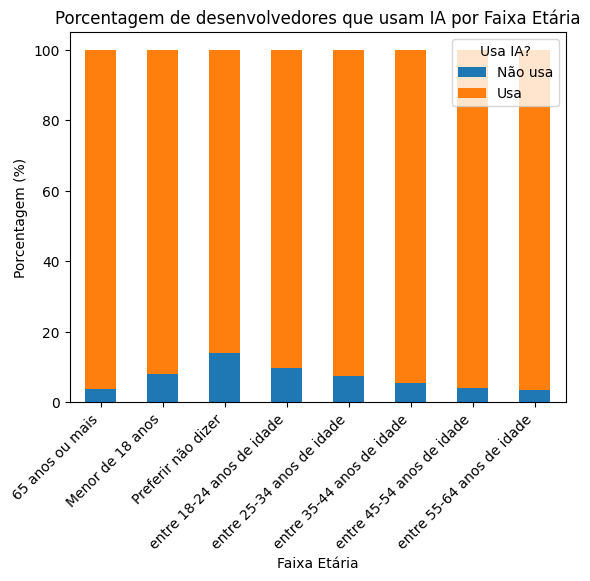

In [38]:
plt.figure(figsize=(10, 6))
idade_usa_ia.plot(kind='bar', stacked=True)
plt.title('Porcentagem de desenvolvedores que usam IA por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Porcentagem (%)')
plt.legend(title='Usa IA?')
plt.xticks(rotation=45, ha='right')
plt.show()

**Quais são as profissões que mais utilizam IA?**


In [39]:
profissao_usa_ia = round((pd.crosstab(profissao_df, usa_IA_df, normalize='index') * 100),2)
print("\nPorcentagem de desenvolvedores que usam IA em cada profissão:")
print(profissao_usa_ia)


Porcentagem de desenvolvedores que usam IA em cada profissão:
AISelect                  Não usa    Usa
MainBranch                              
Dev Profissional             6.67  93.33
Entusiasta                   6.48  93.52
Estagiarios                  6.70  93.30
Estudante de Programação    11.12  88.88


<Figure size 1000x600 with 0 Axes>

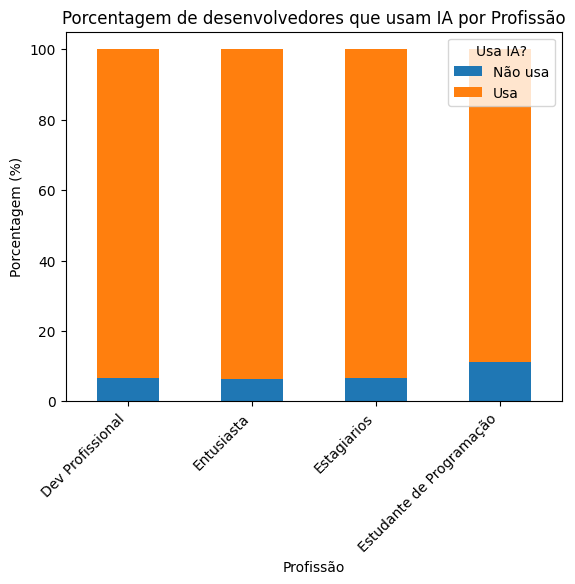

In [40]:
plt.figure(figsize=(10, 6))
profissao_usa_ia.plot(kind='bar', stacked=True)
plt.title('Porcentagem de desenvolvedores que usam IA por Profissão')
plt.xlabel('Profissão')
plt.ylabel('Porcentagem (%)')
plt.legend(title='Usa IA?')
plt.xticks(rotation=45, ha='right')
plt.show()

**Qual a opinião predominante sobre a IA entre os desenvolvedores?**

In [41]:
opiniao_ia_contagem = ia_opniao_df.value_counts()
print("\nOpinião predominante sobre a IA:")
print(opiniao_ia_contagem)


Opinião predominante sobre a IA:
AISent
Favorável        22167
Outro            21325
Não respondeu    19564
Desfavorável      2381
Name: count, dtype: int64


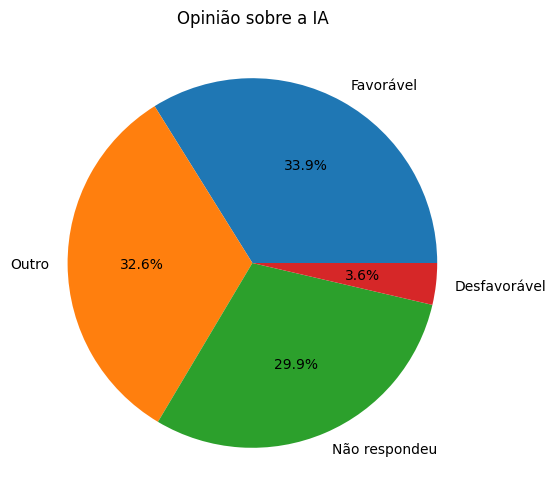

In [42]:
plt.figure(figsize=(8, 6))
opiniao_ia_contagem.plot(kind='pie', autopct='%1.1f%%')
plt.title('Opinião sobre a IA')
plt.ylabel('')
plt.show()


**Existe alguma correlação entre o tamanho da empresa e a adoção de ferramentas de IA?**

In [43]:
tamanho_empresa_usa_ia = round((pd.crosstab(tamanho_empresa_df, usa_IA_df, normalize='index') * 100),2)
print("\nCorrelação entre tamanho da empresa e adoção de ferramentas de IA:")
print(tamanho_empresa_usa_ia)


Correlação entre tamanho da empresa e adoção de ferramentas de IA:
AISelect                               Não usa    Usa
OrgSize                                              
Apenas eu (autônomo)                      2.01  97.99
Grande (1000-4999 funcionários)           2.22  97.78
Grande (500-999 funcionários)             1.89  98.11
Muito Grande (10000+ funcionários)        2.45  97.55
Muito Grande (5000-9999 funcionários)     2.14  97.86
Média (100-499 funcionários)              2.39  97.61
Média (20-99 funcionários)                2.47  97.53
Outro                                    18.09  81.91
Pequena (10-19 funcionários)              2.55  97.45
Pequena (2-9 funcionários)                2.44  97.56


<Figure size 1200x600 with 0 Axes>

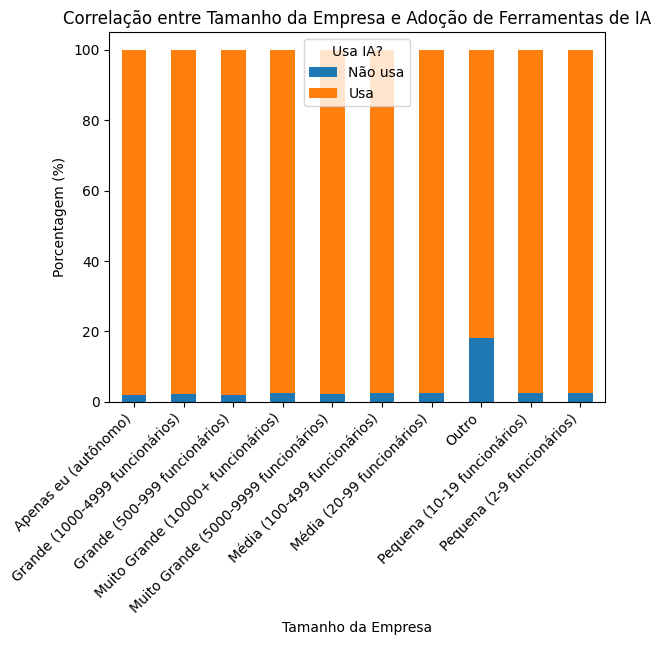

In [44]:
plt.figure(figsize=(12, 6))
tamanho_empresa_usa_ia.plot(kind='bar', stacked=True)
plt.title('Correlação entre Tamanho da Empresa e Adoção de Ferramentas de IA')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Porcentagem (%)')
plt.legend(title='Usa IA?')
plt.xticks(rotation=45, ha='right')
plt.show()

**Há diferenças significativas entre as opiniões sobre a IA de acordo com a profissão ou idade?**

In [45]:
opiniao_ia_profissao = round((pd.crosstab(profissao_df, ia_opniao_df, normalize='index') * 100),2)
opiniao_ia_idade = round((pd.crosstab(idade_df, ia_opniao_df, normalize='index') * 100),2)

print("\nDiferenças nas opiniões sobre a IA por profissão:")
print(opiniao_ia_profissao)

print("\nDiferenças nas opiniões sobre a IA por idade:")
print(opiniao_ia_idade)



Diferenças nas opiniões sobre a IA por profissão:
AISent                    Desfavorável  Favorável  Não respondeu  Outro
MainBranch                                                             
Dev Profissional                  3.71      34.24          29.04  33.01
Entusiasta                        3.93      28.31          42.29  25.46
Estagiarios                       3.19      32.42          32.24  32.15
Estudante de Programação          3.20      36.26          26.68  33.86

Diferenças nas opiniões sobre a IA por idade:
AISent                     Desfavorável  Favorável  Não respondeu  Outro
Age                                                                     
65 anos ou mais                    2.72      20.73          49.35  27.20
Menor de 18 anos                   4.60      32.71          35.36  27.34
Preferir não dizer                 2.48      16.77          50.62  30.12
entre 18-24 anos de idade          3.66      36.51          28.93  30.91
entre 25-34 anos de idade       

# Insights para a V8.Tech


**1. Forte Apelo da IA:**

A alta adoção de ferramentas de IA indica que as pessoas provavelmente já estão familiarizados com a tecnologia e estarão receptivos a novas soluções.

A opinião predominantemente favorável sobre a IA sugere que a empresa pode esperar um feedback positivo ao implementar novas ferramentas.

**2. Considerações sobre o Perfil dos Colaboradores:**

Não há grandes discrepâncias entre as diferentes faixas etárias e nem as areas de atuação em relação à adoção e opinião sobre a IA. Isso significa que a empresa pode implementar uma solução única para todos os colaboradores, sem a necessidade de soluções personalizadas.

**3. Impacto do Tamanho da Empresa:**

A maior adoção em empresas maiores pode indicar que a V8.Tech, se for uma empresa de grande porte, já possui uma cultura mais propícia à inovação e à adoção de novas tecnologias.


# Recomendações para a V8.Tech

Priorizar ferramentas com interface intuitiva e fácil de usar: Isso facilitará a adoção por todos os colaboradores, independentemente do nível de experiência técnica.
Escolher ferramentas com foco em produtividade e eficiência: Aumentar a produtividade é um dos principais motivadores para a adoção de ferramentas de IA.

Considerar ferramentas que se integrem com as ferramentas já utilizadas pela empresa: Isso minimizará a necessidade de mudanças drásticas nos processos de trabalho.

Implementar um programa de treinamento e suporte: Oferecer treinamento e suporte contínuos aos colaboradores é essencial para garantir o sucesso da implementação.

Monitorar o impacto das novas ferramentas: Acompanhar o desempenho e o feedback dos colaboradores permitirá ajustar a estratégia e otimizar o uso das ferramentas.
